In [1]:
import numpy as np

# Full transformation matrices for image_02 and image_03
T_02 = np.array([
    [0.9995185086,  0.0041276589, -0.0307524527, 0.7264036936],
    [-0.0307926666, 0.0100608424, -0.9994751579, -0.1499658517],
    [-0.0038160970, 0.9999408692, 0.0101830998, -1.0686400091],
    [0, 0, 0, 1]
])

T_03 = np.array([
    [-0.9996821702, 0.0005703407, -0.0252038325, 0.7016842127],
    [-0.0252033830, 0.0007820814, 0.9996820384, 0.7463650950],
    [0.0005898709, 0.9999995315, -0.0007674583, -1.0751978255],
    [0, 0, 0, 1]
])

# Extract rotation matrices
R_02 = T_02[:3, :3]
R_03 = T_03[:3, :3]

# Extract translation vectors
t_02 = T_02[:3, 3]
t_03 = T_03[:3, 3]

# Calculate the inverse of R_02 (which is its transpose since it's a rotation matrix)
R_02_inv = np.transpose(R_02)

# Calculate the rotation matrix from image_02 to image_03
R_02_to_03 = np.dot(R_03, R_02_inv)

# Calculate the translation vector from image_02 to image_03
t_02_to_03 = t_03 - np.dot(R_02_to_03, t_02)

print("Rotation matrix from image_02 to image_03:")
print(R_02_to_03)

print("Translation vector from image_02 to image_03:")
print(t_02_to_03)


Rotation matrix from image_02 to image_03:
[[-0.9984234   0.05597922  0.00412854]
 [-0.05593069 -0.99837342  0.01105808]
 [ 0.00474085  0.01080973  0.99993033]]
Translation vector from image_02 to image_03:
[ 1.43974955  0.64908854 -0.00845494]


In [2]:
from lightglue import LightGlue, SuperPoint, DISK, SIFT, ALIKED, DoGHardNet
from lightglue.utils import load_image, rbd

# SuperPoint+LightGlue
extractor = SuperPoint(max_num_keypoints=2048).eval().cuda()  # load the extractor
matcher = LightGlue(features='superpoint').eval().cuda()  # load the matcher

# load each image as a torch.Tensor on GPU with shape (3,H,W), normalized in [0,1]
image0 = load_image('/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_192x640/0000000001.png').cuda()
image1 = load_image('/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_01/data_192x640/0000000001.png').cuda()

# extract local features
feats0 = extractor.extract(image0)  # auto-resize the image, disable with resize=None
feats1 = extractor.extract(image1)

# match the features
matches01 = matcher({'image0': feats0, 'image1': feats1})
feats0, feats1, matches01 = [rbd(x) for x in [feats0, feats1, matches01]]  # remove batch dimension
matches = matches01['matches']  # indices with shape (K,2)
points0 = feats0['keypoints'][matches[..., 0]]  # coordinates in image #0, shape (K,2)
points1 = feats1['keypoints'][matches[..., 1]]  # coordinates in image #1, shape (K,2)

points0 = feats0['keypoints'][matches[..., 0]]  
points1 = feats1['keypoints'][matches[..., 1]]  


print("Matched keypoints in image 0:", points0)
print("Matched keypoints in image 1:", points1)



Matched keypoints in image 0: tensor([[111.0625,   4.8160],
        [153.5625,   4.8160],
        [410.4375,   4.8160],
        [611.0625,   4.8160],
        [617.3125,   4.8160],
        [360.4375,   5.4414],
        [253.5625,   6.0668],
        [226.6875,   6.6922],
        [371.6875,   6.6922],
        [567.9375,   6.6922],
        [171.0625,   7.3176],
        [141.0625,   7.9430],
        [210.4375,   7.9430],
        [284.1875,   7.9430],
        [329.8125,   8.5684],
        [247.9375,   9.1938],
        [336.0625,   9.1938],
        [446.0625,   9.1938],
        [159.1875,   9.8192],
        [226.0625,   9.8192],
        [359.8125,   9.8192],
        [ 71.6875,  11.0700],
        [101.0625,  11.0700],
        [256.0625,  11.0700],
        [344.1875,  11.0700],
        [492.3125,  11.0700],
        [211.6875,  11.6954],
        [259.1875,  11.6954],
        [329.8125,  11.6954],
        [554.8125,  12.9463],
        [562.3125,  12.9463],
        [271.6875,  13.5717],
        [5

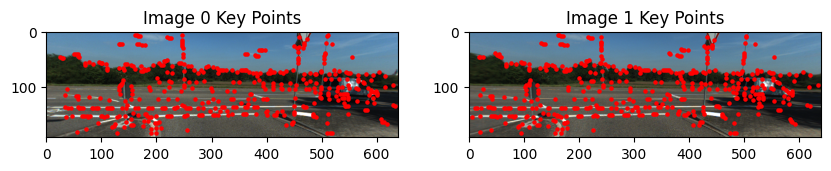

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from lightglue import LightGlue, SuperPoint
from lightglue.utils import load_image, rbd


extractor = SuperPoint(max_num_keypoints=2048).eval().cuda()
matcher = LightGlue(features='superpoint').eval().cuda()


image0 = load_image('/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_2d_raw/2013_05_28_drive_0003_sync/image_00/data_192x640/0000000130.png').cuda()
image1 = load_image('/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_2d_raw/2013_05_28_drive_0003_sync/image_01/data_192x640/0000000130.png').cuda()



feats0 = extractor.extract(image0)
feats1 = extractor.extract(image1)


matches01 = matcher({'image0': feats0, 'image1': feats1})
feats0, feats1, matches01 = [rbd(x) for x in [feats0, feats1, matches01]]  # remove batch dimension
matches = matches01['matches']  # indices with shape (K,2)


points0 = feats0['keypoints'][matches[..., 0]].cpu().numpy()  # coordinates in image #0, shape (K,2)
points1 = feats1['keypoints'][matches[..., 1]].cpu().numpy()  # coordinates in image #1, shape (K,2)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image0.cpu().permute(1, 2, 0).numpy())
axs[0].scatter(points0[:, 0], points0[:, 1], c='r', s=5)
axs[0].set_title('Image 0 Key Points')

axs[1].imshow(image1.cpu().permute(1, 2, 0).numpy())
axs[1].scatter(points1[:, 0], points1[:, 1], c='r', s=5)
axs[1].set_title('Image 1 Key Points')

plt.show()


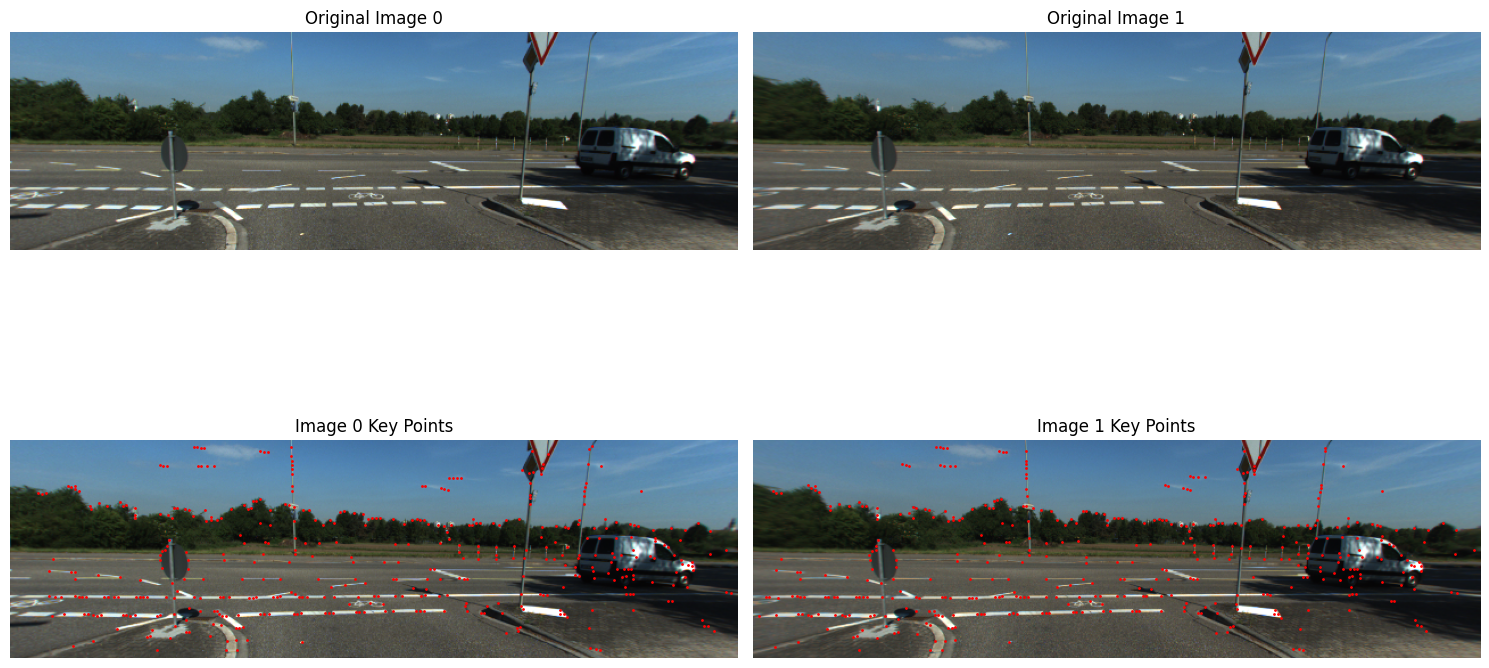

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from lightglue import LightGlue, SuperPoint
from lightglue.utils import load_image, rbd


extractor = SuperPoint(max_num_keypoints=2048).eval().cuda()
matcher = LightGlue(features='superpoint').eval().cuda()


image0_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_2d_raw/2013_05_28_drive_0003_sync/image_00/data_192x640/0000000130.png'
image1_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_2d_raw/2013_05_28_drive_0003_sync/image_01/data_192x640/0000000130.png'

image0 = load_image(image0_path).cuda()
image1 = load_image(image1_path).cuda()


feats0 = extractor.extract(image0)
feats1 = extractor.extract(image1)


matches01 = matcher({'image0': feats0, 'image1': feats1})
feats0, feats1, matches01 = [rbd(x) for x in [feats0, feats1, matches01]]  
matches = matches01['matches']  

points0 = feats0['keypoints'][matches[..., 0]].cpu().numpy()  
points1 = feats1['keypoints'][matches[..., 1]].cpu().numpy()  


image0_cpu = image0.cpu().permute(1, 2, 0).numpy()
image1_cpu = image1.cpu().permute(1, 2, 0).numpy()


fig, axs = plt.subplots(2, 2, figsize=(15, 10))


axs[0, 0].imshow(image0_cpu)
axs[0, 0].set_title('Original Image 0')
axs[0, 0].axis('off')

axs[0, 1].imshow(image1_cpu)
axs[0, 1].set_title('Original Image 1')
axs[0, 1].axis('off')


axs[1, 0].imshow(image0_cpu)
axs[1, 0].scatter(points0[:, 0], points0[:, 1], c='r', s=2)
axs[1, 0].set_title('Image 0 Key Points')
axs[1, 0].axis('off')

axs[1, 1].imshow(image1_cpu)
axs[1, 1].scatter(points1[:, 0], points1[:, 1], c='r', s=2)
axs[1, 1].set_title('Image 1 Key Points')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [6]:
import numpy as np


K2 = np.array([
    [1336.3220825849971, 0, 716.94323510126321],
    [0, 1335.7883350012958, 705.76498308221585],
    [0, 0, 1]
])

K3 = np.array([
    [1485.4388981875156, 0, 698.88316784030962],
    [0, 1484.9477411748708, 698.14541887723055],
    [0, 0, 1]
])


R_02_to_03 = np.array([
    [-0.9984234, 0.05597922, 0.00412854],
    [-0.05593069, -0.99837342, 0.01105808],
    [0.00474085, 0.01080973, 0.99993033]
])

T_02_to_03 = np.array([1.43974955, 0.64908854, -0.00845494])


T_x = np.array([
    [0, -T_02_to_03[2], T_02_to_03[1]],
    [T_02_to_03[2], 0, -T_02_to_03[0]],
    [-T_02_to_03[1], T_02_to_03[0], 0]
])

E = T_x @ R_02_to_03


points0_normalized = np.linalg.inv(K2) @ np.vstack((points0.T, np.ones(points0.shape[0])))
points1_normalized = np.linalg.inv(K3) @ np.vstack((points1.T, np.ones(points1.shape[0])))


for i in range(points0_normalized.shape[1]):
    p1 = points0_normalized[:, i]
    p2 = points1_normalized[:, i]
    result = p2.T @ E @ p1
    print(f'Epipolar constraint result for point pair {i}: {result}')


Epipolar constraint result for point pair 0: 0.9373436306218117
Epipolar constraint result for point pair 1: 0.9722608266225836
Epipolar constraint result for point pair 2: 1.1938499269094713
Epipolar constraint result for point pair 3: 1.3627829477878914
Epipolar constraint result for point pair 4: 1.368166502601419
Epipolar constraint result for point pair 5: 1.1519799303684646
Epipolar constraint result for point pair 6: 1.0570775812698572
Epipolar constraint result for point pair 7: 1.0344171470672185
Epipolar constraint result for point pair 8: 1.1590845586589462
Epipolar constraint result for point pair 9: 1.3223179221956953
Epipolar constraint result for point pair 10: 0.9824298389158941
Epipolar constraint result for point pair 11: 0.9556081204838842
Epipolar constraint result for point pair 12: 1.0152865834317037
Epipolar constraint result for point pair 13: 1.083714770946335
Epipolar constraint result for point pair 14: 1.119061297228669
Epipolar constraint result for point p